This is notebook is for exploratory data analysis. This notebook answers 2 questions in the final report: Question 1 (What is the relationship between odometer and selling price?) and Question 2 (What brand is good to have considering selling later?). Using matplotlib package, I created a scatter plot showing the relationship between odoemter and selling price to answer the Question 1. Also, I generated a line plot of which the x-axis is the year used, and the y-axis is selling price. This data visualization answers the Question 2. Besides that, this notebook also contains other visualization such as a pie chart showing the proportion of values, a bar chart showing the popularity of colors in used car market, and a scatter plot showing the relation between MMR and selling price.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pyspark 
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

     |████████████████████████████████| 281.4 MB 34 kB/s 
     |████████████████████████████████| 198 kB 65.1 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=d072ecdb7329c19735abfc42ba5187922fecf7940d7a9c34f2947a16ebdd9bc1
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark
The following additional packages will be installed:
  openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  openjdk-8-jdk-headless openjdk-8-jre-headless
0 upgraded, 2 newly installed, 0 to remove and 39 not upgraded.
Need to get 36.5 MB of archives.
After this operation, 143 MB of additional disk space will be used.
Selecting previously unselected package openjdk-8-jre-headless:amd64.
(Rea

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
cur_path = "/content/drive/MyDrive/BigData/finalProject/"
os.chdir(cur_path)

In [ ]:
# Start pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('final').getOrCreate()

In [ ]:
# Raw data 
df = spark.read.csv(cur_path + 'car_prices.csv',inferSchema=True,header=True)

# Current processed data
data = spark.read.csv(cur_path + 'cleaned_data.csv',inferSchema=True,header=True)

In [ ]:
data.show()

+---+----+---------+-------------------+--------------------+-----------+------------+-----+------------------+--------+------+--------+--------------------+-----+------------+--------+----------+
|_c0|year|     make|              model|                trim|       body|transmission|state|         condition|odometer| color|interior|              seller|  mmr|sellingprice|saledate|madeRegion|
+---+----+---------+-------------------+--------------------+-----------+------------+-----+------------------+--------+------+--------+--------------------+-----+------------+--------+----------+
|  0|2015|      Kia|            Sorento|                  LX|        suv|   automatic|   ca|               5.0| 16639.0| white|   black|kia motors americ...|20500|       21500|    2014|        5x|
|  1|2015|      Kia|            Sorento|                  LX|        suv|   automatic|   ca|               5.0|  9393.0| white|   beige|kia motors americ...|20800|       21500|    2014|        5x|
|  2|2014|     

In [ ]:
# Convert to Pandas dataframe
df = df.toPandas()

In [ ]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


## 1) Create a pie chart to see the proportion of transmission

In [ ]:
df_vis = data.toPandas()['transmission']

In [ ]:
df_vis = df_vis.value_counts()

In [ ]:
df_vis

automatic    528053
manual        16835
Name: transmission, dtype: int64

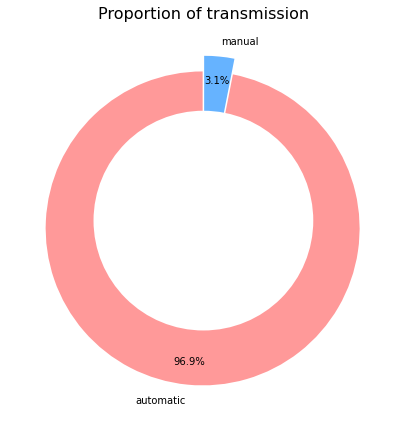

In [ ]:
import matplotlib.pyplot as plt
# Pie chart
labels = ['automatic', 'manual']
sizes = [528053, 16835]
#colors
colors = ['#ff9999','#66b3ff']
#explsion
explode = (0.05,0.05)
 
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Proportion of transmission', fontsize=16)
plt.gcf().set_size_inches(6, 6) 
plt.tight_layout()
plt.show()

In [ ]:
temp = data.toPandas()

In [ ]:
temp.head()

,_c0,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,madeRegion
0,0,2015,Kia,Sorento,LX,suv,automatic,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,2014,5x
1,1,2015,Kia,Sorento,LX,suv,automatic,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,2014,5x
2,2,2014,BMW,3 Series,328i SULEV,sedan,automatic,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,2015,wb
3,3,2015,Volvo,S60,T5,sedan,automatic,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,2015,yv
4,4,2014,BMW,6 Series Gran Coupe,650i,sedan,automatic,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,2014,wb


## 2) Color Popularity VS Selling price

In [ ]:
from pyspark.sql.functions import count, avg
vis = data.groupBy("color").agg(avg("sellingprice"), count("*"))

In [ ]:
vis = vis.toPandas()

In [ ]:
vis = vis.sort_values('avg(sellingprice)', ascending = False)

In [ ]:
vis = vis.reset_index(drop = True)

In [ ]:
vis

,color,avg(sellingprice),count(1)
0,charcoal,16299.048729,472
1,black,16001.054887,133111
2,brown,15487.541522,6611
3,off-white,15344.171731,1415
4,white,14914.069028,103639
5,gray,14010.573861,81525
6,lime,13256.666667,15
7,orange,13049.427492,1986
8,red,12828.677390,42525
9,yellow,12588.092532,1232


In [ ]:
vis = vis.rename({'avg(sellingprice)': 'sellingprice', 'count(1)': 'count'}, axis = 1)

In [ ]:
vis = vis.sort_values('count', ascending = False)
vis = vis.reset_index(drop = True)

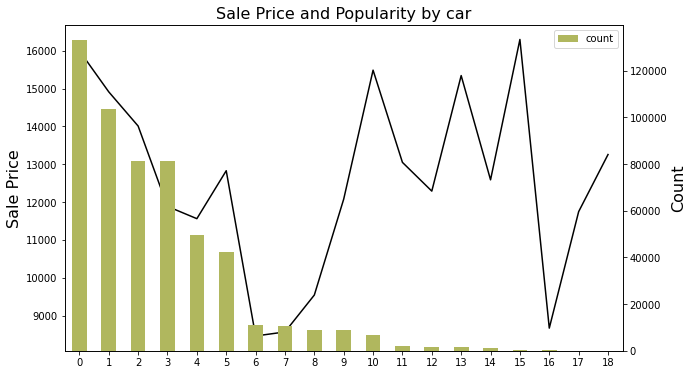

In [ ]:
fig,ax = plt.subplots()
ax.plot(vis.color, vis.sellingprice, color = 'black')
#ax.set_xlabel('Color', fontsize=14)

x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 113, 14, 15, 16, 17, 18]
values = vis.color.tolist()

#add y-axis label
ax.set_ylabel('Sale Price', fontsize=16)
ax2 = ax.twinx()
ax2.set_ylabel('Count', fontsize=16)
ax2 = vis['count'].plot(kind="bar", color = '#B0B75E')

#plt.xticks(x,values)
plt.title('Sale Price and Popularity by car', fontsize=16)
plt.gcf().set_size_inches(10, 6)
plt.legend()
plt.show()

## 3) MMR vs Selling Price

In [ ]:
vis =data.toPandas()

In [ ]:
mmr = np.array(vis['mmr'].tolist())
selling = np.array(vis['sellingprice'].tolist())

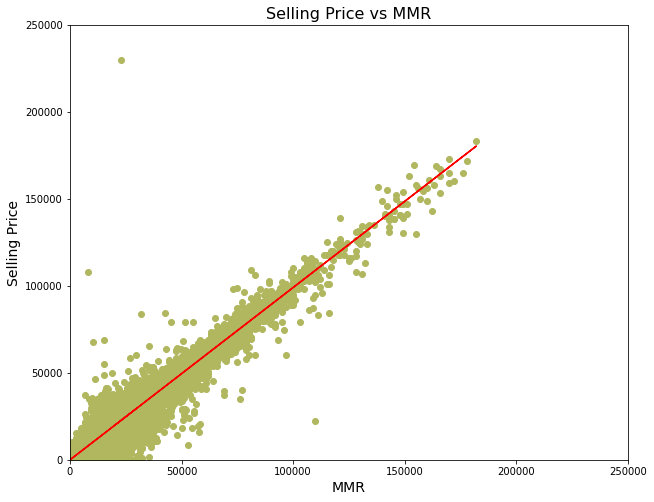

In [ ]:
#use green as color for individual points
plt.plot(mmr, selling, 'o', color = '#B0B75E')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(mmr, selling, 1)

#use red as color for regression line
plt.plot(mmr, m*mmr+b, color='red')

plt.ylabel('Selling Price', fontsize=14)
plt.xlabel('MMR', fontsize=14)
plt.title('Selling Price vs MMR', fontsize=16)
plt.xlim(0, 250000)
plt.ylim(0, 250000)
#display plot
plt.gcf().set_size_inches(10, 8)
plt.show()

In [ ]:
# Calculate the coefficient of linear regression
print(m)
print(b)

0.990811751543605
-32.42466057921439


## 4) Odometer vs Selling Price

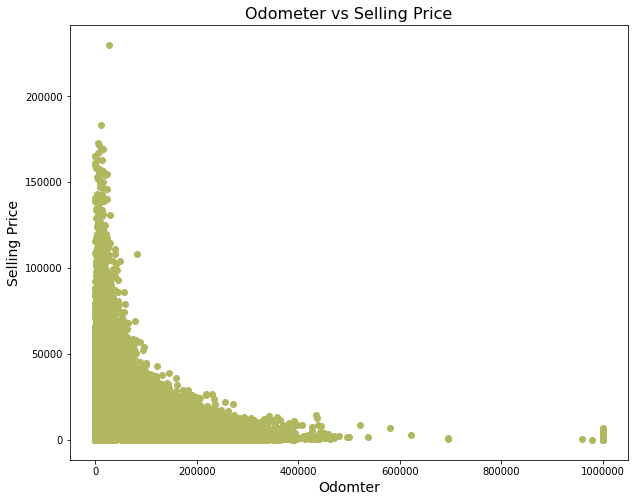

In [ ]:
odometer = df['odometer'].tolist()
sellingprice = df['sellingprice'].tolist()
plt.scatter(odometer, sellingprice, color = '#B0B75E')
plt.ticklabel_format(style='plain')

plt.ylabel('Selling Price', fontsize=14)
plt.xlabel('Odomter', fontsize=14)
plt.title('Odometer vs Selling Price', fontsize=16)
#display plot
plt.gcf().set_size_inches(10, 8)

## 5) Used year (Sale date - year)

In [ ]:
data = data.withColumn('used_year',data.saledate - data.year)

In [ ]:
data= data.filter(data.used_year > 0)

In [ ]:
from pyspark.sql.functions import count, avg
temp = data.groupBy("make", "used_year").agg(avg("sellingprice"), count("*"))

In [ ]:
from pyspark.sql.functions import asc
temp.sort("make", "used_year").show()

+-----+---------+------------------+--------+
| make|used_year| avg(sellingprice)|count(1)|
+-----+---------+------------------+--------+
|Acura|        1| 30325.96685082873|     181|
|Acura|        2|21796.979166666668|     480|
|Acura|        3| 20473.99299474606|    1713|
|Acura|        4|20077.881040892193|     269|
|Acura|        5| 16573.37398373984|     246|
|Acura|        6|           13768.6|     250|
|Acura|        7|11700.948509485095|     369|
|Acura|        8|  10385.6608478803|     401|
|Acura|        9| 7055.773955773956|     407|
|Acura|       10| 5784.880636604775|     377|
|Acura|       11| 4520.936639118458|     363|
|Acura|       12|3285.7017543859647|     285|
|Acura|       13|2782.0588235294117|     170|
|Acura|       14|2283.6206896551726|     116|
|Acura|       15|1474.4117647058824|      85|
|Acura|       16|         1498.4375|      48|
|Acura|       17|1377.0833333333333|      24|
|Acura|       18|             960.0|      30|
|Acura|       19| 788.461538461538

In [ ]:
model_df = temp.toPandas()

In [ ]:
model_df.head()

,make,used_year,avg(sellingprice),count(1)
0,Cadillac,2,26302.042208,616
1,Bentley,4,109125.000000,4
2,Scion,10,3312.903226,62
3,Porsche,16,6007.142857,14
4,Hyundai,5,7167.377049,854


In [ ]:
model_df = model_df.sort_values(['make', 'used_year'])

In [ ]:
# Create a dataframe for Ford
ford = model_df[(model_df['make'] == 'Ford')&(model_df['used_year'] <= 10)]
ford = ford.rename({'avg(sellingprice)': 'Ford'}, axis = 1)

In [ ]:
ford.head()

,make,used_year,Ford,count(1)
229,Ford,1,19390.310033,19914
658,Ford,2,17636.997207,21840
49,Ford,3,15451.915536,15474
643,Ford,4,15289.994471,7416
706,Ford,5,13317.196203,3950


In [ ]:
# Create a dataframe for Chevrolet
ford = model_df[(model_df['make']
chev = model_df[(model_df['make'] == 'Chevrolet')&(model_df['used_year'] <= 10)]
chev = chev.rename({'avg(sellingprice)': 'Chevrolet'}, axis = 1)

In [ ]:
chev.head()

,make,used_year,Chevrolet,count(1)
96,Chevrolet,1,17969.119280,9725
285,Chevrolet,2,14197.302257,10812
391,Chevrolet,3,13089.989601,7212
167,Chevrolet,4,12590.752158,5213
433,Chevrolet,5,10973.678710,3598


In [ ]:
# Create a dataframe for Nissan
nissan = model_df[(model_df['make'] == 'Nissan')&(model_df['used_year'] <= 10)]
nissan = nissan.rename({'avg(sellingprice)': 'Nissan'}, axis = 1)

In [ ]:
nissan.head()

,make,used_year,Nissan,count(1)
329,Nissan,1,15198.267032,6018
340,Nissan,2,13797.249916,11852
126,Nissan,3,13089.186527,16566
553,Nissan,4,13203.296208,5432
114,Nissan,5,10146.734306,1577


In [ ]:
# Create a dataframe for toyota
toyota = model_df[(model_df['make'] == 'Toyota')&(model_df['used_year'] <= 10)]
toyota = toyota.rename({'avg(sellingprice)': 'Toyota'}, axis = 1)

In [ ]:
toyota.head()

,make,used_year,Toyota,count(1)
550,Toyota,1,17301.817151,5644
258,Toyota,2,15796.815719,6718
447,Toyota,3,15214.138338,7207
570,Toyota,4,14083.751211,3923
156,Toyota,5,10994.809232,2123


In [ ]:
# Create a dataframe for dodge
dodge = model_df[(model_df['make'] == 'Dodge')&(model_df['used_year'] <= 10)]
dodge = dodge.rename({'avg(sellingprice)': 'Dodge'}, axis = 1)

In [ ]:
dodge.head()

,make,used_year,Dodge,count(1)
688,Dodge,1,17444.014427,6793
378,Dodge,2,13044.687674,5760
723,Dodge,3,11658.106368,2858
162,Dodge,4,10945.483497,1727
626,Dodge,5,10051.116601,2530


In [ ]:
# Merge all data to crate visualization
merge_df = pd.merge(ford, chev, on = ['used_year'])
merge_df = pd.merge(merge_df, nissan, on = ['used_year'])
merge_df = pd.merge(merge_df, toyota, on = ['used_year'])
merge_df = pd.merge(merge_df, dodge, on = ['used_year'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'make_x', 'count(1)_x'} in the result is deprecated and will raise a MergeError in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# Remove unnecessary columns
final_df = merge_df.drop(['make_x', 'count(1)_x', 'make_y', 'count(1)_y','make', 'count(1)'], axis = 1)

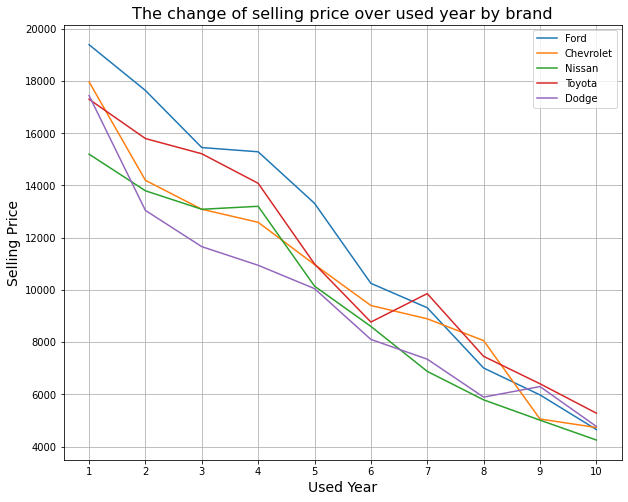

In [ ]:
#plot individual lines
plt.plot(final_df['Ford'], label = 'Ford')
plt.plot(final_df['Chevrolet'], label = 'Chevrolet')
plt.plot(final_df['Nissan'], label = 'Nissan')
plt.plot(final_df['Toyota'], label = 'Toyota')
plt.plot(final_df['Dodge'], label = 'Dodge')

x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

#add legend
plt.legend()

#add axis labels and a title
plt.ylabel('Selling Price', fontsize=14)
plt.xlabel('Used Year', fontsize=14)
plt.title('The change of selling price over used year by brand', fontsize=16)
plt.xticks(x,values)

#display plot
plt.gcf().set_size_inches(10, 8)
plt.grid()
plt.show()

In [ ]:
honda = model_df[(model_df['make'] == 'Honda')&(model_df['used_year'] <= 10)]
honda = honda.rename({'avg(sellingprice)': 'Honda'}, axis = 1)

In [ ]:
honda.head()

,make,used_year,Honda,count(1)
655,Honda,1,19518.736018,1341
399,Honda,2,17094.650637,3140
237,Honda,3,14633.842458,8055
383,Honda,4,13653.871748,1653
775,Honda,5,10729.176940,1379


In [ ]:
# Create a dataframe for hyundai
hyun = model_df[(model_df['make'] == 'Hyundai')&(model_df['used_year'] <= 10)]
hyun = hyun.rename({'avg(sellingprice)': 'Hyundai'}, axis = 1)

In [ ]:
# Create a dataframe for BMW
bmw = model_df[(model_df['make'] == 'BMW')&(model_df['used_year'] <= 10)]
bmw = bmw.rename({'avg(sellingprice)': 'BMW'}, axis = 1)

In [ ]:
# Create a dataframe for kia
kia = model_df[(model_df['make'] == 'Kia')&(model_df['used_year'] <= 10)]
kia = kia.rename({'avg(sellingprice)': 'Kia'}, axis = 1)

In [ ]:
# Create a dataframe for kia
kia = model_df[(model_df['make'] == 'Kia')&(model_df['used_year'] <= 10)]
kia = kia.rename({'avg(sellingprice)': 'Kia'}, axis = 1)
ch = model_df[(model_df['make'] == 'Chrysler')&(model_df['used_year'] <= 10)]
ch = ch.rename({'avg(sellingprice)': 'Chrysler'}, axis = 1)

In [ ]:
# Merge 5 data more
merge_df = pd.merge(merge_df, honda, on = ['used_year'])
merge_df = pd.merge(merge_df, hyun, on = ['used_year'])
merge_df = pd.merge(merge_df, bmw, on = ['used_year'])
merge_df = pd.merge(merge_df, kia, on = ['used_year'])
merge_df = pd.merge(merge_df, ch, on = ['used_year'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'make_x', 'count(1)_x'} in the result is deprecated and will raise a MergeError in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'make_x', 'count(1)_x'} in the result is deprecated and will raise a MergeError in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'make_x', 'count(1)_x'} in the result is deprecated and will raise a MergeError in a future version.
  """


In [ ]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 9
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   make_x      10 non-null     object 
 1   used_year   10 non-null     int32  
 2   Ford        10 non-null     float64
 3   count(1)_x  10 non-null     int64  
 4   make_y      10 non-null     object 
 5   Chevrolet   10 non-null     float64
 6   count(1)_y  10 non-null     int64  
 7   make_x      10 non-null     object 
 8   Nissan      10 non-null     float64
 9   count(1)_x  10 non-null     int64  
 10  make_y      10 non-null     object 
 11  Toyota      10 non-null     float64
 12  count(1)_y  10 non-null     int64  
 13  make_x      10 non-null     object 
 14  Dodge       10 non-null     float64
 15  count(1)_x  10 non-null     int64  
 16  make_y      10 non-null     object 
 17  Honda       10 non-null     float64
 18  count(1)_y  10 non-null     int64  
 19  make_x      10 non-null     obje

In [ ]:
# Remove unnecessay data
final_df = merge_df.drop(['make_x', 'count(1)_x', 'make_y', 'count(1)_y'], axis = 1)

In [ ]:
final_df

,used_year,Ford,Chevrolet,Nissan,Toyota,Dodge,Honda,Hyundai,BMW,Kia,Chrysler
0,1,19390.310033,17969.119280,15198.267032,17301.817151,17444.014427,19518.736018,14786.681346,42285.836000,14254.139810,18211.996599
1,2,17636.997207,14197.302257,13797.249916,15796.815719,13044.687674,17094.650637,12368.503511,33666.205637,12345.293514,13907.753546
2,3,15451.915536,13089.989601,13089.186527,15214.138338,11658.106368,14633.842458,12657.723534,29495.134494,11846.200000,12290.043878
3,4,15289.994471,12590.752158,13203.296208,14083.751211,10945.483497,13653.871748,9856.235592,21678.572879,9656.027344,11334.424779
4,5,13317.196203,10973.678710,10146.734306,10994.809232,10051.116601,10729.176940,7167.377049,18318.656716,6385.740469,7850.217678
5,6,10254.306240,9405.369063,8604.958047,8771.838988,8107.114228,9426.249054,6630.499276,15534.939086,5333.498099,6404.850000
6,7,9319.009704,8895.899134,6883.421734,9860.627815,7350.933004,8122.926755,5447.772727,12403.322472,4183.734531,5824.938367
7,8,7011.961585,8061.536424,5793.160246,7459.021632,5897.559932,6852.621483,4621.318681,10227.827381,3456.349741,4487.008227
8,9,5982.890630,5059.293230,5016.534765,6409.293369,6301.774786,5433.618299,3189.333333,8145.836324,2823.835920,4022.229064
9,10,4657.910603,4734.691286,4254.884076,5284.238311,4775.186514,4330.490099,2373.604651,6462.446505,2165.490798,3251.331019


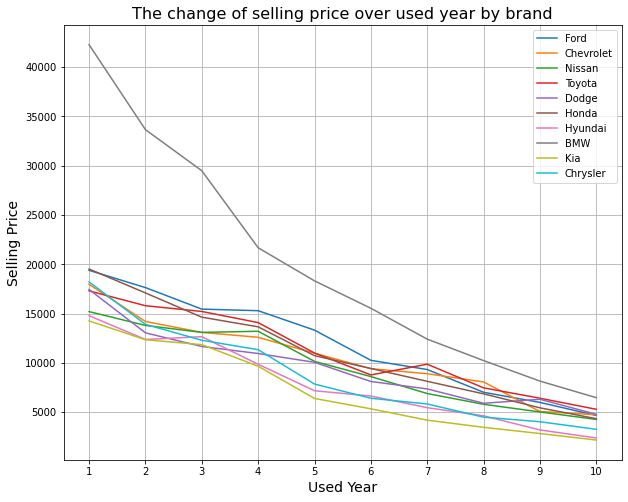

In [ ]:
#plot individual lines
plt.plot(final_df['Ford'], label = 'Ford')
plt.plot(final_df['Chevrolet'], label = 'Chevrolet')
plt.plot(final_df['Nissan'], label = 'Nissan')
plt.plot(final_df['Toyota'], label = 'Toyota')
plt.plot(final_df['Dodge'], label = 'Dodge')
plt.plot(final_df['Honda'], label = 'Honda')
plt.plot(final_df['Hyundai'], label = 'Hyundai')
plt.plot(final_df['BMW'], label = 'BMW')
plt.plot(final_df['Kia'], label = 'Kia')
plt.plot(final_df['Chrysler'], label = 'Chrysler')

x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

#add legend
plt.legend()

#add axis labels and a title
plt.ylabel('Selling Price', fontsize=14)
plt.xlabel('Used Year', fontsize=14)
plt.title('The change of selling price over used year by brand', fontsize=16)
plt.xticks(x,values)

#display plot
plt.gcf().set_size_inches(10, 8)
plt.grid()
plt.show()

## Create a table showing the rate of price decrease

In [ ]:
name = ['Ford', 'Chevrolet', 'Nissan', 'Toyota', 'Dodge', 'Honda', 'Hyundai', 'BMW',  'Kia', 'Chrysler']

In [ ]:
data = {'Name': name, 'price': res}
result = pd.DataFrame(data)

In [ ]:
result.sort_values('price', ascending = False)

,Name,price
7,BMW,3582.338950
5,Honda,1518.824592
9,Chrysler,1496.066558
0,Ford,1473.239943
1,Chevrolet,1323.442799
4,Dodge,1266.882791
6,Hyundai,1241.307670
8,Kia,1208.864901
3,Toyota,1201.757884
2,Nissan,1094.338296
